<a href="https://colab.research.google.com/github/chi-hun/dacon/blob/main/%EC%B2%AD%EA%B2%BD%EC%B1%84_%EC%84%B1%EC%9E%A5_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

청경채 성장 예측 AI 경진대회 https://dacon.io/competitions/official/235961/overview/description

# module

In [246]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 84 kB/s 


In [264]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 8.1 MB/s 
     |████████████████████████████████| 10.4 MB 45.3 MB/s 
     |████████████████████████████████| 88 kB 6.3 MB/s 
     |████████████████████████████████| 25.9 MB 67.5 MB/s 
     |████████████████████████████████| 2.0 MB 49.1 MB/s 
     |████████████████████████████████| 636 kB 35.7 MB/s 
     |████████████████████████████████| 167 kB 65.8 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 3.3 MB 48.5 MB/s 
     |████████████████████████████████| 1.7 MB 42.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 134 kB 51.9 MB/s 
     |████████████████████████████████| 17.0 MB 56.4 MB/s 
     |████████████████████████████████

In [265]:
!pip install jinja2 markupsafe==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.0 which is incompatible.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from pycaret.regression import *
from pycaret.utils import enable_colab

# data load

In [ ]:
!unzip /content/open.zip

# EDA

내부온도 관측치(평균, 최대, 최소), 내부습도 관측치(평균, 최대, 최소), CO2관측치,(평균, 최대, 최소), 최근분무량(합계) , EC관측치(평균, 최대, 최소)


In [ ]:
df = pd.read_csv('/content/train_input/CASE_01.csv')
df.head()

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,카메라상태,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,2021-02-17 00:00:00,24.799999,40.500000,361.0,0.059069,20.299999,33.200001,0.0,0.0,0.0,...,4.5,0.0,0.0,363.554,16.548,37.596000,363.554,309.41,16.548,37.596
1,2021-02-17 00:01:00,20.500000,44.099998,355.0,0.910134,19.700001,10.700000,0.0,0.0,0.0,...,0.0,20.0,18.0,19.000,0.000,2.500000,0.000,0.00,0.000,0.000
2,2021-02-17 00:02:00,20.600000,44.299999,360.0,0.910134,19.799999,10.600000,0.0,0.0,0.0,...,0.0,20.0,18.0,19.000,0.000,3.000002,0.000,0.00,0.000,0.000
3,2021-02-17 00:03:00,20.600000,44.500000,359.0,0.908579,19.799999,10.400000,0.0,0.0,0.0,...,0.0,20.0,18.0,19.000,0.000,3.000002,0.000,0.00,0.000,0.000
4,2021-02-17 00:04:00,20.600000,44.500000,357.0,0.910134,19.799999,10.300000,0.0,0.0,0.0,...,0.0,20.0,18.0,19.000,0.000,3.000002,0.000,0.00,0.000,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41760 entries, 0 to 41759
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시간             41760 non-null  object 
 1   내부온도관측치        41758 non-null  float64
 2   내부습도관측치        41758 non-null  float64
 3   CO2관측치         41758 non-null  float64
 4   EC관측치          41758 non-null  float64
 5   외부온도관측치        41758 non-null  float64
 6   외부습도관측치        41758 non-null  float64
 7   펌프상태           41758 non-null  float64
 8   펌프작동남은시간       41758 non-null  float64
 9   최근분무량          41758 non-null  float64
 10  일간누적분무량        41758 non-null  float64
 11  냉방상태           41758 non-null  float64
 12  냉방작동남은시간       41758 non-null  float64
 13  난방상태           41758 non-null  float64
 14  난방작동남은시간       41758 non-null  float64
 15  내부유동팬상태        41758 non-null  float64
 16  내부유동팬작동남은시간    41758 non-null  float64
 17  외부환기팬상태        41758 non-null  float64
 18  외부환기팬작

In [ ]:
df.tail()

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,카메라상태,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
41755,2021-03-17 23:55:00,20.4,78.000000,470.0,0.313223,20.400000,31.500000,0.0,0.0,769.0,...,0.0,20.0,18.0,19.0,0.0,1.999998,0.0,0.0,0.0,0.0
41756,2021-03-17 23:56:00,20.4,78.199997,471.0,0.314777,20.500000,31.400000,0.0,0.0,769.0,...,0.0,20.0,18.0,19.0,0.0,1.999998,0.0,0.0,0.0,0.0
41757,2021-03-17 23:57:00,20.5,79.199997,468.0,0.315554,20.600000,31.299999,0.0,0.0,769.0,...,0.0,20.0,18.0,19.0,0.0,1.999998,0.0,0.0,0.0,0.0
41758,2021-03-17 23:58:00,20.6,79.599998,471.0,0.316332,20.799999,31.200001,0.0,0.0,769.0,...,0.0,20.0,18.0,19.0,0.0,2.500000,0.0,0.0,0.0,0.0
41759,2021-03-17 23:59:00,20.6,79.900002,476.0,0.316332,20.900000,31.100000,0.0,0.0,769.0,...,0.0,20.0,18.0,19.0,0.0,3.000002,0.0,0.0,0.0,0.0


In [ ]:
df2 = pd.read_csv('/content/train_target/CASE_01.csv')
df2

,시간,rate
0,2021-02-18 00:00:00,0.50000
1,2021-02-19 00:00:00,0.66667
2,2021-02-20 00:00:00,0.60000
3,2021-02-21 00:00:00,-0.12500
4,2021-02-22 00:00:00,1.42857
5,2021-02-23 00:00:00,0.35294
6,2021-02-24 00:00:00,0.30435
7,2021-02-25 00:00:00,0.16667
8,2021-02-26 00:00:00,0.22857
9,2021-02-27 00:00:00,0.32558


In [ ]:
size = [1]
for i, j in enumerate(df2['rate']):
    x = size[i] * (j+1)
    size.append(x)
print(size)

[1, 1.5, 2.500005, 4.000008, 3.500007, 8.500011999989999, 11.50000623526647, 15.000033132969818, 17.5000886552419, 21.50008391917054, 28.500081241574083, 37.500121896850764, 49.00028427895799, 62.00054970100833, 83.500480320827, 108.00035625176083, 167.00095087209777, 224.0017154237622, 294.50177531908287, 345.0029397507992, 368.004285743985, 398.0039951178347, 402.5054203026174, 399.5067549213629, 392.50739657514066, 381.50541424913945, 351.00405637992077, 356.50428994339416, 355.5025128886532, 330.5035761823231]


In [ ]:
df['year'] = pd.to_datetime(df['시간']).dt.year
df['month'] = pd.to_datetime(df['시간']).dt.month
df['day'] = pd.to_datetime(df['시간']).dt.day
df['hour'] = pd.to_datetime(df['시간']).dt.hour
df['minute'] = pd.to_datetime(df['시간']).dt.minute

In [ ]:
df.columns

Index(['시간', '내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치', '외부온도관측치', '외부습도관측치',
       '펌프상태', '펌프작동남은시간', '최근분무량', '일간누적분무량', '냉방상태', '냉방작동남은시간', '난방상태',
       '난방작동남은시간', '내부유동팬상태', '내부유동팬작동남은시간', '외부환기팬상태', '외부환기팬작동남은시간',
       '화이트 LED상태', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED상태', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED상태', '블루 LED작동남은시간', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '난방부하', '냉방부하', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

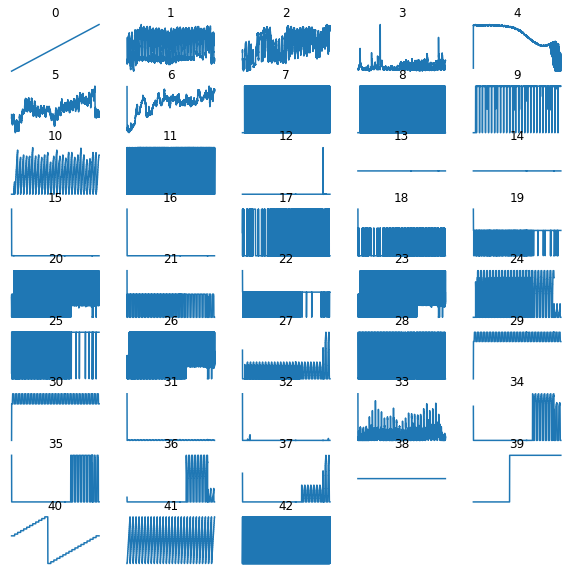

In [ ]:
plt.figure(figsize=(10,10))
for i, j in enumerate(df.columns):
    plt.subplot(9,5,i+1)
    plt.plot(df[j])
    plt.axis(False)
    plt.title(i)
plt.show()

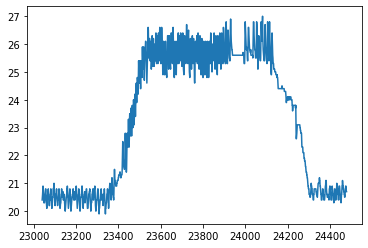

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['내부온도관측치'])
plt.show()

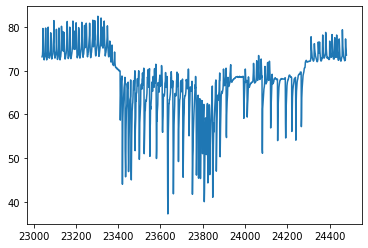

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['내부습도관측치'])
plt.show()

In [ ]:
df['md'] = df['month'].astype('str') + df['day'].astype('str')
df.head(2)

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,year,month,day,hour,minute,md
0,2021-02-17 00:00:00,24.799999,40.500000,361.0,0.059069,20.299999,33.200001,0.0,0.0,0.0,...,363.554,309.41,16.548,37.596,2021,2,17,0,0,217
1,2021-02-17 00:01:00,20.500000,44.099998,355.0,0.910134,19.700001,10.700000,0.0,0.0,0.0,...,0.000,0.00,0.000,0.000,2021,2,17,0,1,217


In [ ]:
xx = {}
for i in df.columns:
    xx[i] = []
print(xx)

{'시간': [], '내부온도관측치': [], '내부습도관측치': [], 'CO2관측치': [], 'EC관측치': [], '외부온도관측치': [], '외부습도관측치': [], '펌프상태': [], '펌프작동남은시간': [], '최근분무량': [], '일간누적분무량': [], '냉방상태': [], '냉방작동남은시간': [], '난방상태': [], '난방작동남은시간': [], '내부유동팬상태': [], '내부유동팬작동남은시간': [], '외부환기팬상태': [], '외부환기팬작동남은시간': [], '화이트 LED상태': [], '화이트 LED작동남은시간': [], '화이트 LED동작강도': [], '레드 LED상태': [], '레드 LED작동남은시간': [], '레드 LED동작강도': [], '블루 LED상태': [], '블루 LED작동남은시간': [], '블루 LED동작강도': [], '카메라상태': [], '냉방온도': [], '난방온도': [], '기준온도': [], '난방부하': [], '냉방부하': [], '총추정광량': [], '백색광추정광량': [], '적색광추정광량': [], '청색광추정광량': [], 'year': [], 'month': [], 'day': [], 'hour': [], 'minute': []}


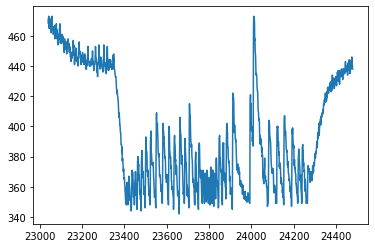

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['CO2관측치'])
plt.show()

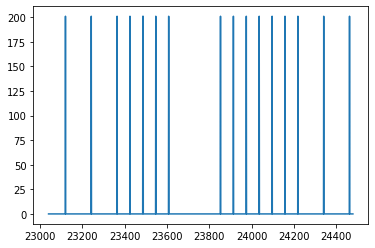

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['펌프상태'])
plt.show()

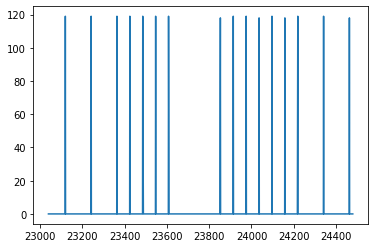

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['펌프작동남은시간'])
plt.show()

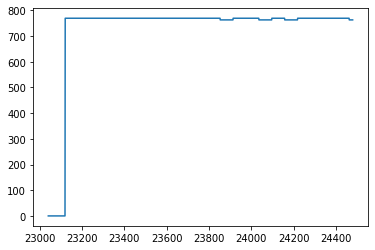

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['최근분무량'])
plt.show()

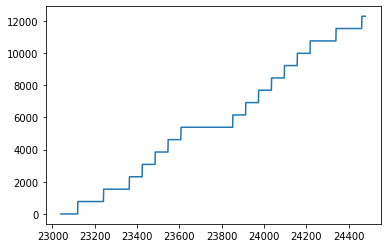

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['일간누적분무량'])
plt.show()

In [ ]:
df.columns

Index(['시간', '내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치', '외부온도관측치', '외부습도관측치',
       '펌프상태', '펌프작동남은시간', '최근분무량', '일간누적분무량', '냉방상태', '냉방작동남은시간', '난방상태',
       '난방작동남은시간', '내부유동팬상태', '내부유동팬작동남은시간', '외부환기팬상태', '외부환기팬작동남은시간',
       '화이트 LED상태', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED상태', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED상태', '블루 LED작동남은시간', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '난방부하', '냉방부하', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량', 'year', 'month', 'day', 'hour', 'minute', 'md'],
      dtype='object')

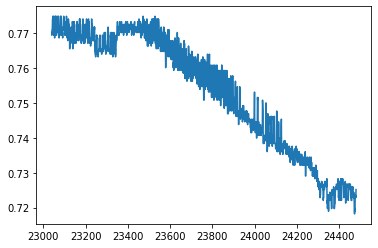

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['EC관측치'])
plt.show()

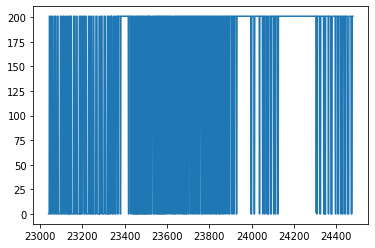

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['냉방상태'])
plt.show()

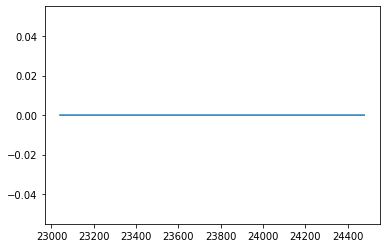

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['난방상태'])
plt.show()

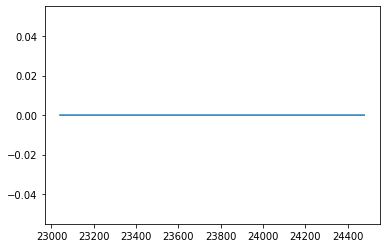

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['내부유동팬상태'])
plt.show()

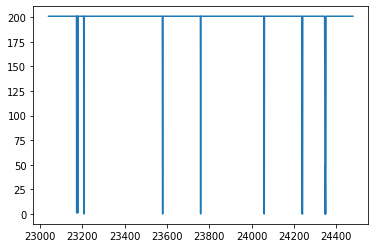

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['화이트 LED상태'])
plt.show()

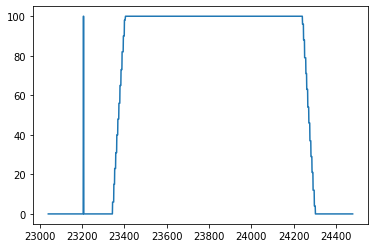

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['화이트 LED동작강도'])
plt.show()

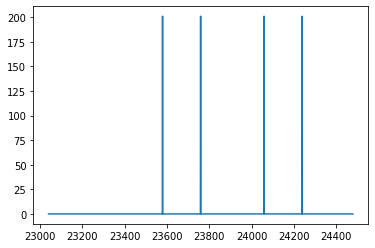

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['카메라상태'])
plt.show()

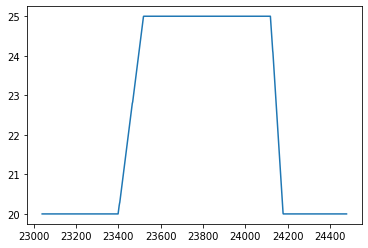

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['냉방온도'])
plt.show()

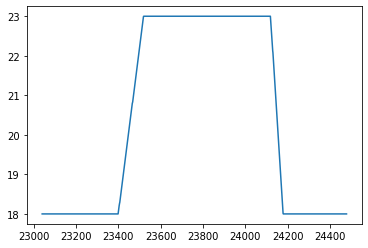

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['난방온도'])
plt.show()

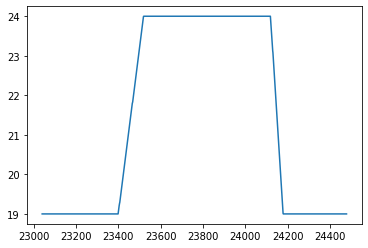

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['기준온도'])
plt.show()

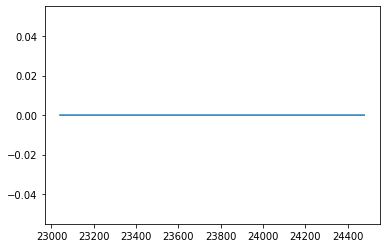

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['총추정광량'])
plt.show()

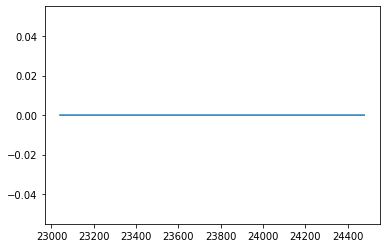

In [ ]:
plt.plot(df[(df['month'] == 3) & (df['day'] == 5)]['백색광추정광량'])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_

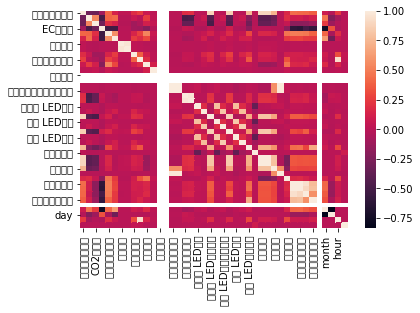

In [ ]:
a = df.corr()
sns.heatmap(a)
plt.show()

# data preprcessing

In [3]:
x_train_path = '/content/train_input'
x_train_csv = sorted(glob.glob(x_train_path+'/*'))

In [5]:
for i, j in enumerate(x_train_csv):
    if i == 0:
        aa = pd.read_csv(j).columns
    else:
        bb = pd.read_csv(j).columns
        if (aa != bb).any():
            print(f'file : {j}')
            print(f'a : {set(aa) - set(bb)}')
            print(f'b : {set(bb) - set(aa)}')

file : /content/train_input/CASE_10.csv
a : {'일간누적분무량'}
b : {'펌프작동남은시간.1'}
file : /content/train_input/CASE_18.csv
a : {'일간누적분무량'}
b : {'펌프작동남은시간.1'}
file : /content/train_input/CASE_30.csv
a : {'외부습도관측치', '외부온도관측치'}
b : {'외부온도추정관측치', '외부습도추정관측치'}
file : /content/train_input/CASE_31.csv
a : {'외부습도관측치', '외부온도관측치'}
b : {'외부온도추정관측치', '외부습도추정관측치'}
file : /content/train_input/CASE_34.csv
a : {'외부습도관측치', '외부온도관측치'}
b : {'외부온도추정관측치', '외부습도추정관측치'}
file : /content/train_input/CASE_36.csv
a : {'외부습도관측치', '최근분무량', '일간누적분무량', '외부온도관측치'}
b : {'펌프최근분무량', '외부온도추정관측치', '펌프일간누적분무량', '외부습도추정관측치'}
file : /content/train_input/CASE_37.csv
a : {'외부습도관측치', '외부온도관측치'}
b : {'외부온도추정관측치', '외부습도추정관측치'}
file : /content/train_input/CASE_38.csv
a : {'외부습도관측치', '최근분무량', '일간누적분무량', '외부온도관측치'}
b : {'펌프최근분무량', '외부온도추정관측치', '펌프일간누적분무량', '외부습도추정관측치'}
file : /content/train_input/CASE_39.csv
a : {'외부습도관측치', '외부온도관측치'}
b : {'외부온도추정관측치', '외부습도추정관측치'}
file : /content/train_input/CASE_40.csv
a : {'외부습도관측치', '최근분무량', '일간누적분무량', 

In [6]:
what = [['내부온도관측치', 'min'],['내부온도관측치', 'max'],['내부온도관측치', 'mean'],
        ['내부습도관측치', 'min'],['내부습도관측치', 'max'],['내부습도관측치', 'mean'],
        ['CO2관측치', 'mean'],['CO2관측치', 'sum'],
        ['EC관측치', 'mean'],['EC관측치', 'sum'],
        ['최근분무량', 'mean'],
        ['화이트 LED동작강도', 'min'],['화이트 LED동작강도', 'max'],['화이트 LED동작강도', 'mean'],
        ['레드 LED동작강도', 'min'],['레드 LED동작강도', 'max'],['레드 LED동작강도', 'mean'],
        ['레드 LED동작강도', 'min'],['레드 LED동작강도', 'max'],['레드 LED동작강도', 'mean'],
        ['블루 LED동작강도', 'min'],['블루 LED동작강도', 'max'],['블루 LED동작강도', 'mean'],
        ['총추정광량', 'mean'],['백색광추정광량', 'mean'],['적색광추정광량', 'mean'],['청색광추정광량', 'mean']
        ]

In [7]:
def make_data(path, what):
    case = {}
    df = pd.read_csv(path)
    df['md'] = pd.to_datetime(df['시간']).dt.month.astype('str') + pd.to_datetime(df['시간']).dt.day.astype('str')
    day_uni = list(set(df.md.values))

    if path.split('/')[-1].split('.')[0] == 'CASE_43':
        df['time'] = pd.to_datetime(df['시간'])
        df = df[~(df['time'].dt.day == 21)]
        day_uni = list(set(df.md.values))
    
    if '최근분무량' not in df.columns:
        df['최근분무량'] = df['펌프최근분무량']
    
    df_na = df.isna().sum()
    if df_na.sum() > 0:
        print(path)
        na_col = [df.columns[i] for i, j in enumerate(df_na) if j > 0]
        for i in na_col:
            df[i] = df[i].interpolate()

    for i in what:
        dic_keyname = i[0] + '_' + i[1]
        dic_items = []
        for j in day_uni:
            df_see = df[df['md'] == j]
            df_see_app = df_see[i[0]].apply(i[1])
            dic_items.append(df_see_app)
        case[dic_keyname] = dic_items
    xxx = pd.DataFrame(case)
    return xxx        

def make_x(list_csv):
    for i, j in enumerate(list_csv):
        if i == 0:
            x_data = make_data(j, what)
            x_data['day'] = x_data.index + 1
        else:
            x_data_2 = make_data(j,what)
            x_data_2['day'] = x_data_2.index + 1
            x_data = pd.concat([x_data, x_data_2])
            
    return x_data

In [8]:
x_train = make_x(x_train_csv)

/content/train_input/CASE_01.csv
/content/train_input/CASE_02.csv
/content/train_input/CASE_04.csv
/content/train_input/CASE_06.csv
/content/train_input/CASE_07.csv
/content/train_input/CASE_08.csv
/content/train_input/CASE_09.csv
/content/train_input/CASE_14.csv
/content/train_input/CASE_15.csv
/content/train_input/CASE_16.csv
/content/train_input/CASE_17.csv
/content/train_input/CASE_18.csv
/content/train_input/CASE_19.csv
/content/train_input/CASE_21.csv
/content/train_input/CASE_22.csv
/content/train_input/CASE_23.csv
/content/train_input/CASE_24.csv
/content/train_input/CASE_28.csv
/content/train_input/CASE_30.csv
/content/train_input/CASE_35.csv
/content/train_input/CASE_37.csv
/content/train_input/CASE_38.csv
/content/train_input/CASE_39.csv
/content/train_input/CASE_40.csv
/content/train_input/CASE_41.csv
/content/train_input/CASE_42.csv
/content/train_input/CASE_43.csv
/content/train_input/CASE_44.csv
/content/train_input/CASE_45.csv
/content/train_input/CASE_47.csv
/content/t

In [9]:
x_train

,내부온도관측치_min,내부온도관측치_max,내부온도관측치_mean,내부습도관측치_min,내부습도관측치_max,내부습도관측치_mean,CO2관측치_mean,CO2관측치_sum,EC관측치_mean,EC관측치_sum,최근분무량_mean,화이트 LED동작강도_min,화이트 LED동작강도_max,화이트 LED동작강도_mean,레드 LED동작강도_min,레드 LED동작강도_max,레드 LED동작강도_mean,블루 LED동작강도_min,블루 LED동작강도_max,블루 LED동작강도_mean,총추정광량_mean,백색광추정광량_mean,적색광추정광량_mean,청색광추정광량_mean,day
0,20.400000,26.900000,23.518889,33.900002,81.599998,66.849792,403.634722,581234.0,0.531267,765.024446,737.303014,0.0,100.0,62.453472,0.0,100.0,51.869097,0.0,14.0,5.934028,288.352704,193.224396,85.837004,9.291303,1
1,20.299999,27.100000,23.540243,24.700001,76.599998,61.163924,379.369097,546291.5,0.909937,1310.308740,724.381840,0.0,100.0,62.642708,0.0,100.0,51.444444,0.0,14.0,5.876042,0.000000,0.000000,0.000000,0.000000,2
2,19.799999,26.799999,23.159132,22.900000,81.199997,49.547465,363.014583,522741.0,0.899382,1295.110064,749.459674,0.0,100.0,62.645486,0.0,100.0,51.479861,0.0,14.0,5.868750,0.000000,0.000000,0.000000,0.000000,3
3,20.400000,26.799999,23.444028,35.400002,81.099998,68.366076,401.768750,578547.0,0.606734,873.697203,750.810847,0.0,100.0,62.572917,0.0,100.0,51.796181,0.0,14.0,5.928472,118.423630,79.638696,33.851002,4.933931,4
4,20.100000,26.799999,23.162361,24.600000,82.099998,56.271771,366.835069,528242.5,0.904847,1302.980275,763.508757,0.0,100.0,62.599653,0.0,100.0,51.450347,0.0,14.0,5.865278,0.000000,0.000000,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,20.500000,28.799999,23.895625,70.800003,84.699997,74.552083,1164.385417,1676715.0,0.072608,104.556131,769.000000,0.0,100.0,47.198611,0.0,29.0,7.474306,0.0,39.0,13.481944,179.478470,146.001769,12.361586,21.115115,21
21,20.000000,28.799999,23.577847,51.260000,84.680002,69.074455,420.021528,604831.0,6.971359,10038.757102,769.000000,0.0,100.0,47.186806,0.0,29.0,7.485417,0.0,39.0,13.476389,179.490098,145.996398,12.384569,21.109131,22
22,21.400000,28.700001,24.531805,63.099998,82.300003,70.989792,456.044097,656703.5,0.009814,14.132274,769.000000,0.0,100.0,47.183333,0.0,29.0,7.490972,0.0,39.0,13.484028,179.538076,146.012513,12.400658,21.124905,23
23,19.900000,32.500000,24.026624,57.799999,72.000000,67.346521,573.369097,825651.5,0.010241,14.746564,769.000000,0.0,100.0,47.179861,0.0,29.0,7.467361,0.0,39.0,13.475000,179.423948,145.956647,12.358713,21.108588,24


In [10]:
y_train_path = '/content/train_target'
y_train_csv = sorted(glob.glob(y_train_path+'/*'))


In [11]:
def make_y(list_csv):
    for i, j in enumerate(list_csv):
        if i == 0:
            y_data = pd.read_csv(j)
        else:
            y_data_2 = pd.read_csv(j)
            y_data = pd.concat([y_data, y_data_2])
            
    return y_data

In [12]:
y_train = make_y(y_train_csv)

In [13]:
y_train = y_train['rate']
y_train

0     0.50000
1     0.66667
2     0.60000
3    -0.12500
4     1.42857
       ...   
20   -0.07888
21   -0.15838
22   -0.47374
23   -0.51767
24   -0.50000
Name: rate, Length: 1813, dtype: float64

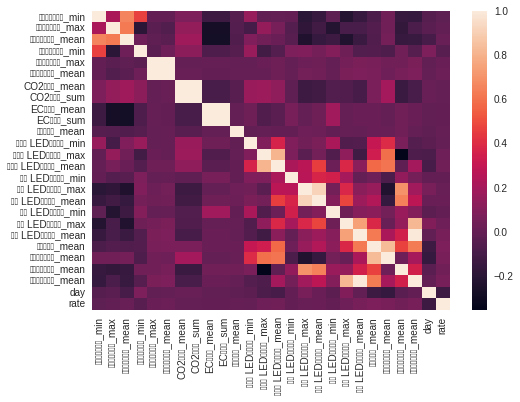

In [14]:
xxxx = pd.concat([x_train, y_train], axis=1)
sns.heatmap(xxxx.corr())
plt.show()

# model select

In [15]:
x_ttrain, x_ttest, y_ttrain, y_ttest  = train_test_split(x_train, y_train, test_size=0.2)
x_ttrain.shape, x_ttest.shape, y_ttrain.shape, y_ttest.shape

((1450, 25), (363, 25), (1450,), (363,))

In [16]:
knr = KNeighborsRegressor()
svr = SVR()
rfr = RandomForestRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
cat = CatBoostRegressor(verbose=0)

In [17]:
models = [knr, svr, rfr, xgb, lgbm, cat]
for i in models:
    model = i.fit(x_ttrain, y_ttrain)
    pre = model.predict(x_ttest)
    sc = model.score(x_ttrain, y_ttrain)
    rmse = mean_squared_error(y_ttest, pre, squared=False) * 100
    print(f'{model.__class__.__name__}, sc : {sc:.3f}, rmse : {rmse:.3f}')

KNeighborsRegressor, sc : 0.327, rmse : 125.418
SVR, sc : -0.004, rmse : 122.366
RandomForestRegressor, sc : 0.860, rmse : 127.612
XGBRegressor, sc : 1.000, rmse : 127.267
LGBMRegressor, sc : 0.507, rmse : 128.269
CatBoostRegressor, sc : 0.991, rmse : 144.500


In [18]:
train = pd.concat([x_train, y_train], axis=1)

In [19]:
df = setup(data = train, target = 'rate', silent=True)

,Description,Value
0,session_id,2022
1,Target,rate
2,Original Data,"(1813, 26)"
3,Missing Values,False
4,Numeric Features,25
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1269, 22)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='rate',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [22]:
top5 = compare_models(sort='rmse', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.2898,2.824000e+00,1.1138,-5.130000e-02,0.2377,3.4380,0.025
dummy,Dummy Regressor,0.2979,2.860300e+00,1.1220,-5.180000e-02,0.2456,6.9040,0.013
llar,Lasso Least Angle Regression,0.2979,2.860300e+00,1.1220,-5.180000e-02,0.2456,6.9040,0.026
huber,Huber Regressor,0.2808,2.952500e+00,1.1240,6.300000e-03,0.2437,4.4082,0.040
en,Elastic Net,0.2907,2.939300e+00,1.1255,-4.880000e-02,0.2450,3.3552,0.018
lasso,Lasso Regression,0.2869,2.989300e+00,1.1273,-2.230000e-02,0.2428,3.7331,0.017
br,Bayesian Ridge,0.3193,3.131200e+00,1.1601,-1.378000e-01,0.2604,6.1237,0.035
lr,Linear Regression,0.3295,3.085600e+00,1.1883,-4.807000e-01,0.2683,4.0873,0.483
ridge,Ridge Regression,0.3296,3.086000e+00,1.1885,-4.825000e-01,0.2684,4.0878,0.016
ada,AdaBoost Regressor,0.3219,2.961900e+00,1.2215,-1.230500e+00,0.2626,6.3562,0.176


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:[OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None), DummyRegressor(constant=None, quantile=None, strategy='mean'), LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=2022, verbose=False), HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=2022, selection='cyclic', tol=0.0001, warm_start=False)]
INFO:logs:compare_models() succesfully completed......................................


In [24]:
tuned_model = [tune_model(i) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2428,0.2323,0.4819,0.0930,0.2352,2.3284
1,0.7025,22.1686,4.7084,-0.0536,0.4382,7.3888
2,0.3463,3.2565,1.8046,0.0072,0.3049,5.2517
3,0.3205,1.3377,1.1566,0.0376,0.2762,4.9876
4,0.2186,0.0891,0.2986,-0.0657,0.1875,4.6561
5,0.2208,0.1111,0.3333,-0.4760,0.1886,3.6200
6,0.2239,0.0995,0.3155,-0.0108,0.1970,3.4291
7,0.3154,1.8889,1.3744,-0.0030,0.2809,3.0626
8,0.2705,0.2510,0.5010,0.0226,0.2334,1.9249


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 3
INFO:logs:OrthogonalMatchingPursuit(fit_intercept=False, n_nonzero_coefs=6,
                          normalize=False, precompute='auto', tol=None)
INFO:logs:tune_model() succesfully completed......................................
INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=DummyRegressor(constant=None, quantile=None, strategy='mean'), fold=None, round=4, n_iter=10, custom_grid=None, optimize=R2, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=False, fit_kwargs=None, groups=None, return_tuner=False, verbose=True, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:45:06
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Dummy Regressor


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Dummy Regressor
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:10 is bigger than total combinations 1, setting search algorithm to grid


ValueError: ignored